# Homework #3

# 509191237


## Question #1

For this question you will use [Olivetti Face Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

### Part 1

1. Split your dataset as train and test subset. But make sure that each test set contains exactly one random image from each distinct individual. This means, you will have to write your own train_test_split function for this dataset.

2. Construct an SVM model on your train set, and test its accuracy on your test set. For this part, the images viewed as integer vectors of length 4096 are independent variables while the id number of the person that picture belongs to is the dependent variable. In other words, you are trying to construct an SVM model that recognizes individuals based on their pictures.

3. Repeat Step 2 ten times.

4. Calculate the mean accuracy and get 95% confidence interval using the t-test.

### Part 2

Do the same things you did in Part 1 but with a multinomial regression model.

First, let's load the data.<




In [10]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

faces = fetch_olivetti_faces()
    
print(f"Dataset labels: {faces.target}")

Dataset labels: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 3

Let's write definition for train and test splitter. We will only use each data once. Since there will be a separate average for each data used, I subtracted the average set from the defined set.



In [36]:
def train_test_split (faces):
    text_index=[]
    for i in range (40):
        k = np.random.randit(0,10)
        kml=i*10+k
        test_index.append(kml)

    
    test_X= faces.data[test_index]
    train_X = test_X - test_X.mean(axis=0, keepdims=True)
    test_y= faces.target[test_index]
    train_y = test_y - test_y.mean(axis=0, keepdims=True)
    return test_X,test_y,train_X,train_y


Construct an SVM model

In [51]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  0,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36])

Let's estimate how accurately the classifier or model can predict the faces.

In [67]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.99


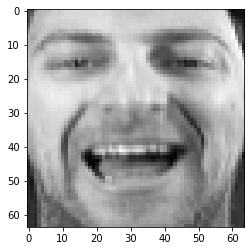

In [46]:
plt.imshow(faces.data[np.random.randint(faces.data.shape[0])].reshape((64,64)),
           cmap='binary_r')

Let's calculate the mean accuracy

## Question #2

For this question you will use [Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/).

### Part 1

Convert the dataset into numerical data using [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) from SciKitLearn's `sklearn.feature_extraction.text` module. Make sure that you also record whether a given movie review is positive or negative or neutral. Calling on `CountVectorizer` on individual entries is not going to be enough. You will have to do some preliminary work. Read the documentation carefully.

### Part 2

Using the numerical data you constructed in Part 1, construct an LDA model to see if data projects into a 2D space with clear separation. Analyze your result.


### Part 3

Using the numerical data you constructed in Part 1, 

1. Split the data as train and test using SciKitLearn's `train_test_split` function.
2. Form a multiclass SVM model on the train set and test its accuracy.
3. Repeat a small number of times and get mean accuracy and its error band.

### Part 4

Repeat Part 2 using multinomial regression models instead of SVM.

### Part 5

Using the numerical data you constructed in Part 1, 

1. Construct an PCA model and look at the eigenvalues from largest to smallest. 
2. How many dimensions needed to capture 90% of the variation of the data? (Read the documentation of [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) form SciKitLearn)
3. Transform your data using the result you obtained in Step 2.
4. Construct an SVM model on the new dataset you constructed and cross-validate it.
5. Compare your result with the result you obtained in Part 2.
